# **It's Time To Settle The Score**

In [43]:
!pip install spotipy

In [44]:
#Import necessary packages
import numpy as np
import pandas as pd
from scipy.stats import iqr as sc
import statsmodels.api as sm

#visualizing
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from shapely.geometry import Point, Polygon
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

#metrics and split
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#model imports
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.cluster import KMeans
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
#create our credentials like clientid and client_secret as well as spotify object to access the API
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_id = "ef9f1ca18dc247e3acd1dfadc73781c2"
client_secret = "c5d066ae6103450d8ad05b7196da5074"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [46]:
#Search For Artist
name = ["The Fugees"]
result = sp.search(name)
result['tracks']['items'][1]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/2WKdxPFRD7IqZvlIAvhMgY'},
  'href': 'https://api.spotify.com/v1/artists/2WKdxPFRD7IqZvlIAvhMgY',
  'id': '2WKdxPFRD7IqZvlIAvhMgY',
  'name': 'Fugees',
  'type': 'artist',
  'uri': 'spotify:artist:2WKdxPFRD7IqZvlIAvhMgY'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Mu5NfyYm8n5iTomuKAEHl'},
  'href': 'https://api.spotify.com/v1/artists/2Mu5NfyYm8n5iTomuKAEHl',
  'id': '2Mu5NfyYm8n5iTomuKAEHl',
  'name': 'Ms. Lauryn Hill',
  'type': 'artist',
  'uri': 'spotify:artist:2Mu5NfyYm8n5iTomuKAEHl'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/7aBzpmFXB4WWpPl2F7RjBe'},
  'href': 'https://api.spotify.com/v1/artists/7aBzpmFXB4WWpPl2F7RjBe',
  'id': '7aBzpmFXB4WWpPl2F7RjBe',
  'name': 'Wyclef Jean',
  'type': 'artist',
  'uri': 'spotify:artist:7aBzpmFXB4WWpPl2F7RjBe'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/0kJMPTXq7h3ztpDukSx5iD'},
  'href': 'https://api.spotify.com/v1/

In [47]:
#Extract Spotify albums
#Spotify URIs and album names in separate lists for later

#Extract Artist's uri
artists_uris = result['tracks']['items'][0]['artists'][0]['uri']
#Pull all of the artist's albums
artist_albums = sp.artist_albums(artists_uris, album_type='album')
#Store artist's albums' names' and uris in separate lists
artist_album_names = []
artist_album_uris = []
for i in range(len(artist_albums['items'])):
    artist_album_names.append(artist_albums['items'][i]['name'])
    artist_album_uris.append(artist_albums['items'][i]['uri'])

artist_album_names
artist_album_uris
#Keep names and uris in same order to keep track of duplicate albums

['spotify:album:4fP1LbatBKCKGjwDwE1h1t',
 'spotify:album:18XFe4CPBgVezXkxZP6rTb',
 'spotify:album:0SHdsrvo4oGJiUlYLaqCcu']

In [48]:
#Extract all the songs from every album

#loop through each album to extract key track data.

def album_songs(uri):
    album = uri
    spotify_albums[album] = {}
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = []
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    #pull data on album tracks
    tracks = sp.album_tracks(album)
    for n in range(len(tracks['items'])):
        spotify_albums[album]['album'].append(artist_album_names[album_count])
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])


In [49]:
#apply the function to each album URI in the list to pull the track data and create an empty dictionary called to store the spotify album data.
spotify_albums = {}
album_count = 0
for i in artist_album_uris: #each album
    album_songs(i)
    print(str(artist_album_names[album_count]) + " album songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Bootleg Versions album songs has been added to spotify_albums dictionary
The Score (Expanded Edition) album songs has been added to spotify_albums dictionary
Blunted On Reality album songs has been added to spotify_albums dictionary


In [50]:
#Extract audio features for each song

#store the audio features of each album track and append the data into lists representing all the music tracks for that album we add additional key-values.

def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []

    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)

        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [51]:
#loop through albums extracting the audio features.add a random delay every few albums to avoid sending too many requests at Spotify's API.
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

In [52]:
#add the above spotify music data to a new dataframe
#need to first organise our data into a dictionary to convert into a dataframe.
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums:
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])

len(dic_df['album'])

43

In [53]:
fugees = pd.DataFrame.from_dict(dic_df)
fugees

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,Bootleg Versions,1,0BVSAeklKwWqQzU6Mt2yTB,Ready or Not - Clark Kent/Django Remix,spotify:track:0BVSAeklKwWqQzU6Mt2yTB,0.38000,0.641,0.5250,0.000000,0.1240,-12.705,0.3720,89.917,0.527,28
1,Bootleg Versions,2,1LGZK77vO0P8TJ22ahdCrA,Nappy Heads - Mad Spider Mix,spotify:track:1LGZK77vO0P8TJ22ahdCrA,0.44000,0.812,0.5620,0.000001,0.2550,-12.664,0.4300,96.984,0.709,27
2,Bootleg Versions,3,0Edx0VdKN1EcFWuauyKDcZ,Don't Cry Dry Your Eyes,spotify:track:0Edx0VdKN1EcFWuauyKDcZ,0.11000,0.726,0.4440,0.000138,0.3640,-16.414,0.3100,93.657,0.898,45
3,Bootleg Versions,4,5RhOVaS7zAH7RelBH7w8iC,Vocab - Salaam's Remix,spotify:track:5RhOVaS7zAH7RelBH7w8iC,0.17100,0.655,0.5390,0.011500,0.1160,-16.762,0.2010,89.536,0.430,24
4,Bootleg Versions,5,6mMmKNZCfFPrHOX1AxHzcy,Ready or Not - Salaam's Ready for the Show Remix,spotify:track:6mMmKNZCfFPrHOX1AxHzcy,0.08350,0.593,0.5490,0.000000,0.5010,-12.757,0.4980,93.455,0.653,29
5,Bootleg Versions,6,1opf0Nw2OUosOpnkRFJPnk,Killing Me Softly With His Song - Live at the ...,spotify:track:1opf0Nw2OUosOpnkRFJPnk,0.09110,0.678,0.7090,0.000000,0.3410,-10.647,0.2070,94.999,0.592,31
6,Bootleg Versions,7,0IkkXBRr28sDqDYMeRCbKO,"No Woman, No Cry - Remix w/Steve Marley",spotify:track:0IkkXBRr28sDqDYMeRCbKO,0.14800,0.644,0.4120,0.000000,0.0603,-13.503,0.3580,78.320,0.548,32
7,Bootleg Versions,8,0qJX6ZLZXuTzCmHmORlOiZ,Vocab - Refugees Hip Hop Remix,spotify:track:0qJX6ZLZXuTzCmHmORlOiZ,0.08520,0.781,0.4350,0.000000,0.0922,-14.862,0.4030,86.068,0.531,34
8,The Score (Expanded Edition),1,5Amv02LQjNrMSoOT2L2WmQ,Red Intro,spotify:track:5Amv02LQjNrMSoOT2L2WmQ,0.80400,0.618,0.3640,0.000000,0.1670,-17.524,0.6320,149.662,0.794,43
9,The Score (Expanded Edition),2,2lOnbK3gm1N6keYkUD3mis,How Many Mics,spotify:track:2lOnbK3gm1N6keYkUD3mis,0.10000,0.790,0.5220,0.000012,0.4790,-13.346,0.4440,82.923,0.802,56


In [54]:
#save latest album in df
score = fugees[fugees.album== 'The Score (Expanded Edition)']
# Remove 'id' and 'uri' columns
score = score.drop(columns=['id', 'uri'])

# Sort descending order by column 'tempo'
score= score.sort_values(by='tempo', ascending=False)

score.head(5)

,album,track_number,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
21,The Score (Expanded Edition),14,Fu-Gee-La (feat. John Forté) - Refugee Camp Remix,0.111,0.707,0.4520,0.000002,0.0637,-12.201,0.3780,175.378,0.549,44
8,The Score (Expanded Edition),1,Red Intro,0.804,0.618,0.3640,0.000000,0.1670,-17.524,0.6320,149.662,0.794,43
10,The Score (Expanded Edition),3,Ready or Not,0.209,0.607,0.4220,0.000000,0.0839,-13.364,0.4990,130.470,0.563,76
23,The Score (Expanded Edition),16,Mista Mista,0.950,0.593,0.0583,0.000000,0.1180,-20.177,0.0638,121.406,0.189,38
16,The Score (Expanded Edition),9,The Score (feat. Diamond D),0.259,0.845,0.3120,0.000000,0.3420,-15.843,0.2290,97.002,0.664,49


In [55]:
#Spotify has a duplicate issue which can be addressed by removing all but the most popular songs.

#print(len(soul))
#final_df = soul.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
#print(len(final_df))

In [56]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 21 to 11
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   album             17 non-null     object 
 1   track_number      17 non-null     int64  
 2   name              17 non-null     object 
 3   acousticness      17 non-null     float64
 4   danceability      17 non-null     float64
 5   energy            17 non-null     float64
 6   instrumentalness  17 non-null     float64
 7   liveness          17 non-null     float64
 8   loudness          17 non-null     float64
 9   speechiness       17 non-null     float64
 10  tempo             17 non-null     float64
 11  valence           17 non-null     float64
 12  popularity        17 non-null     int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 1.9+ KB


In [57]:
score.shape

(17, 13)

In [58]:
# Any missing data?
score.isnull().sum()

album               0
track_number        0
name                0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [59]:
score.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,9.000000,0.273408,0.693706,0.399429,0.000003,0.323747,-14.825294,0.369929,100.975471,0.576647,52.294118
std,5.049752,0.266184,0.098831,0.115183,0.000010,0.228426,2.068322,0.186483,27.302851,0.213118,13.104220
min,1.000000,0.007640,0.530000,0.058300,0.000000,0.050100,-20.177000,0.063800,77.887000,0.189000,38.000000
25%,5.000000,0.111000,0.608000,0.364000,0.000000,0.144000,-15.682000,0.229000,88.116000,0.399000,43.000000
50%,9.000000,0.196000,0.700000,0.422000,0.000000,0.280000,-14.277000,0.390000,89.953000,0.563000,47.000000
75%,13.000000,0.418000,0.765000,0.476000,0.000000,0.497000,-13.373000,0.489000,97.002000,0.735000,59.000000
max,17.000000,0.950000,0.846000,0.545000,0.000040,0.790000,-11.709000,0.751000,175.378000,0.911000,81.000000


In [60]:
import plotly.graph_objects as go

# Define sound features and their values
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
values = score[sound_features].mean()

# Create bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=sound_features,
    y=values,
    marker_color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'],  # Set custom colors
    opacity=0.75
))

# Update layout
fig.update_layout(
    title='Average Sound Features for "The Score (Expanded Edition)"',
    xaxis_title='Sound Features',
    yaxis_title='Average Value',
    showlegend=False
)

fig.show()


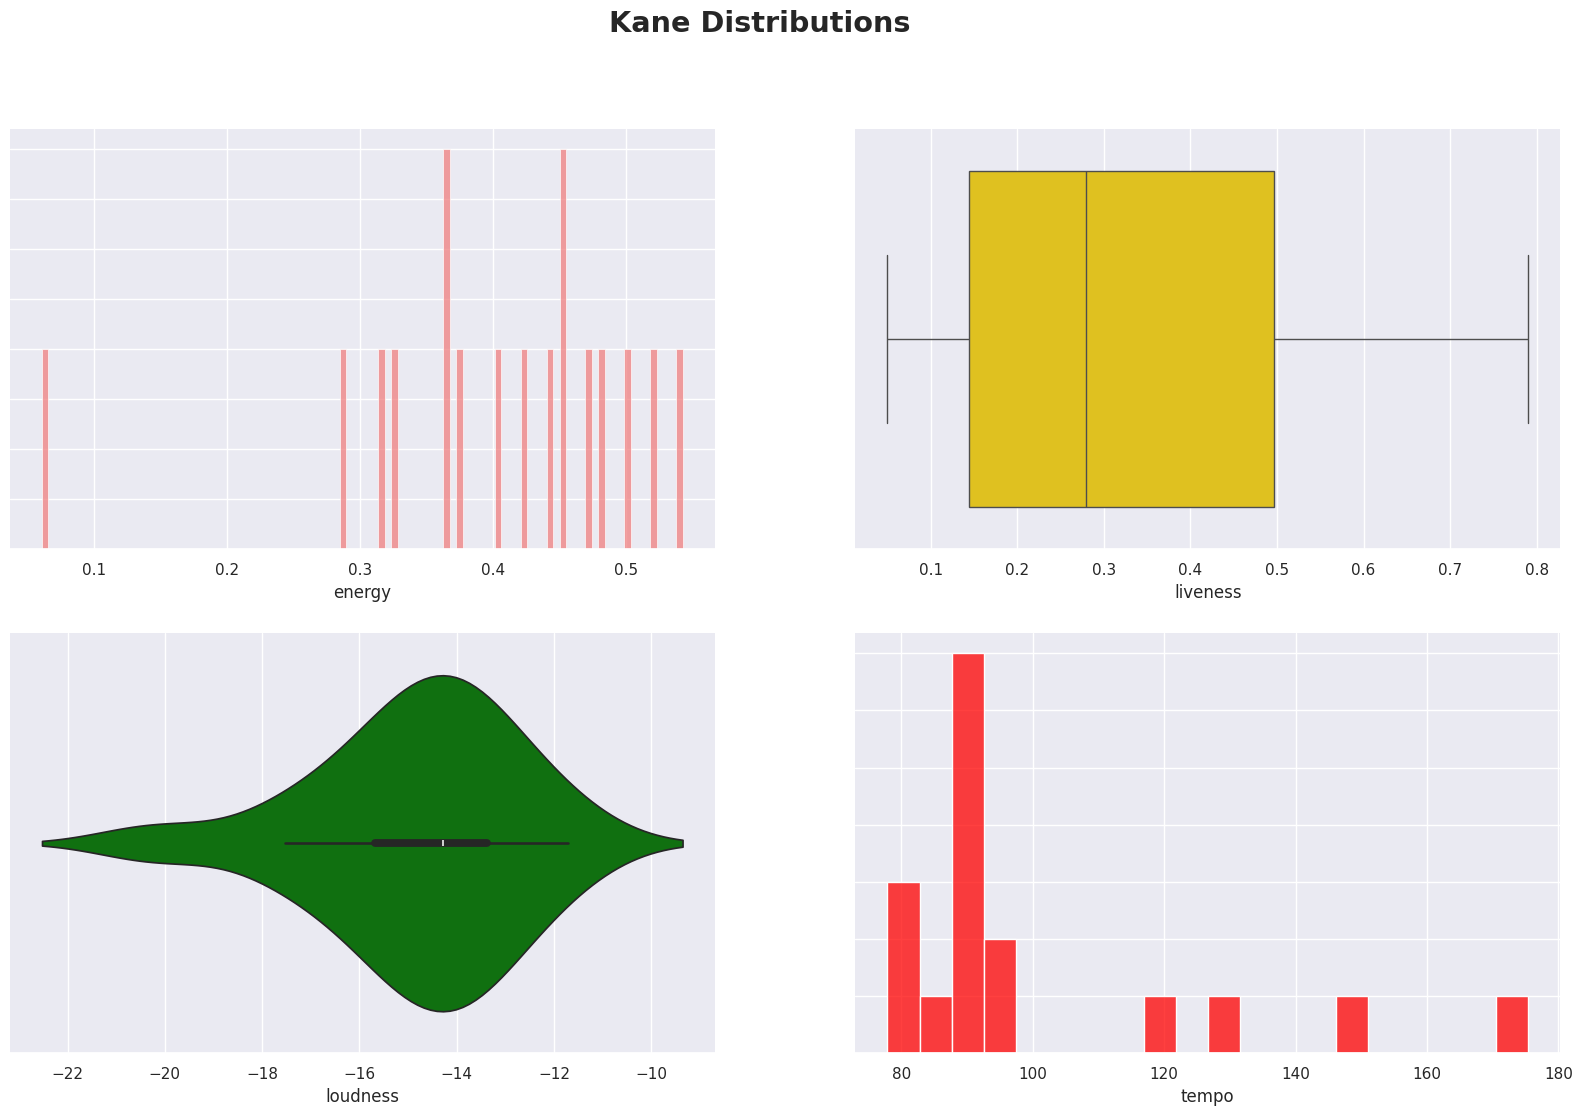

In [61]:
#Plot distribution of certain variables
fig=plt.figure(figsize=(20,12),facecolor='white')

plt.suptitle('Kane Distributions',weight='bold',fontsize='xx-large')

gs=fig.add_gridspec(2,2)

ax=[_ for i in range(4)]

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])
ax[2]=fig.add_subplot(gs[1,0])
ax[3]=fig.add_subplot(gs[1,1])


sns.histplot(x="energy",data=score,ax=ax[0],shrink=0.5,bins=50,color="lightcoral")
sns.histplot(x="tempo",data=score,ax=ax[3],bins=20,color='red')
sns.boxplot(x='liveness',data=score,ax=ax[1],color='gold')
sns.violinplot(x="loudness",data=score,ax=ax[2],color="green")

for i in range(4):

    ax[i].set_yticklabels('')
    ax[i].set_ylabel('')
    ax[i].tick_params('y',length=0)

    for direction in ['top','left','right']:

        ax[i].spines[direction].set_visible(False)

In [62]:
import plotly.graph_objects as go

# Define sound features and their values
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
values = score[sound_features].mean().tolist()

# Create radar chart
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=values,
      theta=sound_features,
      fill='toself',
      name='Sound Features'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=False
)

fig.show()


In [63]:
#funnel plot of energy and instrumentalness
fig = px.funnel(score, x='track_number', y='energy', color='instrumentalness')
fig.show()

In [64]:
#energy
top_energy = score.nlargest(6, 'energy')

fig = px.bar(top_energy, x='track_number', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

In [65]:
#can you dance?
fig = px.scatter_3d(score, x='energy', y='danceability', z='acousticness',
              color='track_number')
fig.show()

In [66]:
#average speechiness
score.groupby(by='track_number')['speechiness'].mean()

track_number
1     0.6320
2     0.4440
3     0.4990
4     0.4890
5     0.7510
6     0.1380
7     0.3900
8     0.1390
9     0.2290
10    0.3620
11    0.2580
12    0.1520
13    0.4930
14    0.3780
15    0.4600
16    0.0638
17    0.4110
Name: speechiness, dtype: float64

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target variable (y)
features = ['energy', 'valence', 'danceability','acousticness','speechiness','instrumentalness']  # Add other relevant features here
X = score[features]
y = score['popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 149.47715397383342
R-squared: -118.58172317906674
